In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/datasets/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = data.iloc[:, :-1].values

In [8]:
import numpy as np
class KMeans:

    def __init__(self, n_clusters=4):
        self.K = n_clusters

    def fit(self, X):
        self.centroids = X[np.random.choice(len(X), self.K, replace=False)]
        self.intial_centroids = self.centroids
        self.prev_label,  self.labels = None, np.zeros(len(X))
        while not np.all(self.labels == self.prev_label) :
            self.prev_label = self.labels
            self.labels = self.predict(X)
            self.update_centroid(X)
        return self

    def predict(self, X):
        return np.apply_along_axis(self.compute_label, 1, X)

    def compute_label(self, x):
        return np.argmin(np.sqrt(np.sum((self.centroids - x)**2, axis=1)))

    def update_centroid(self, X):
        self.centroids = np.array([np.mean(X[self.labels == k], axis=0)  for k in range(self.K)])


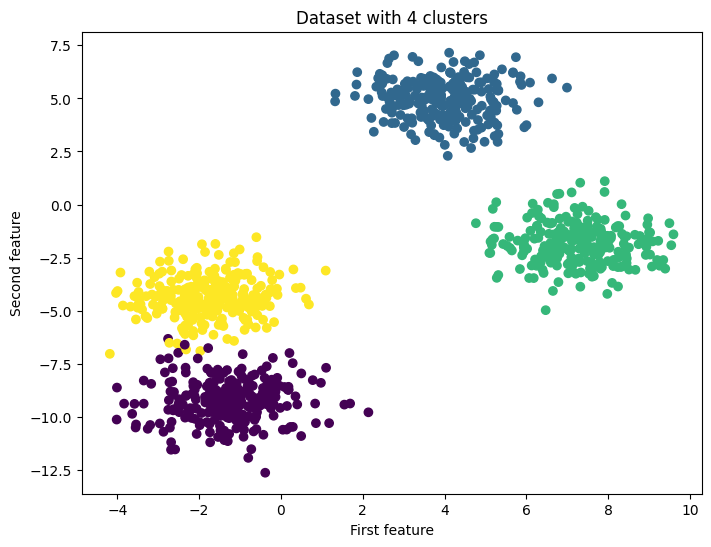

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, n_samples=1000)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset with 4 clusters")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()



In [27]:
kmeans = KMeans(n_clusters=4).fit(X)

In [28]:
row_dict = kmeans.predict(X)

In [24]:
# clusters = {}
# n = 0
# for item in row_dict:
#     if item in clusters:
#         clusters[item].append(row_dict[n])
#     else:
#         clusters[item] = [row_dict[n]]
#     n +=1
# for item in clusters:
#     print ("Cluster ", item)
#     for i in clusters[item]:
#         print(i)

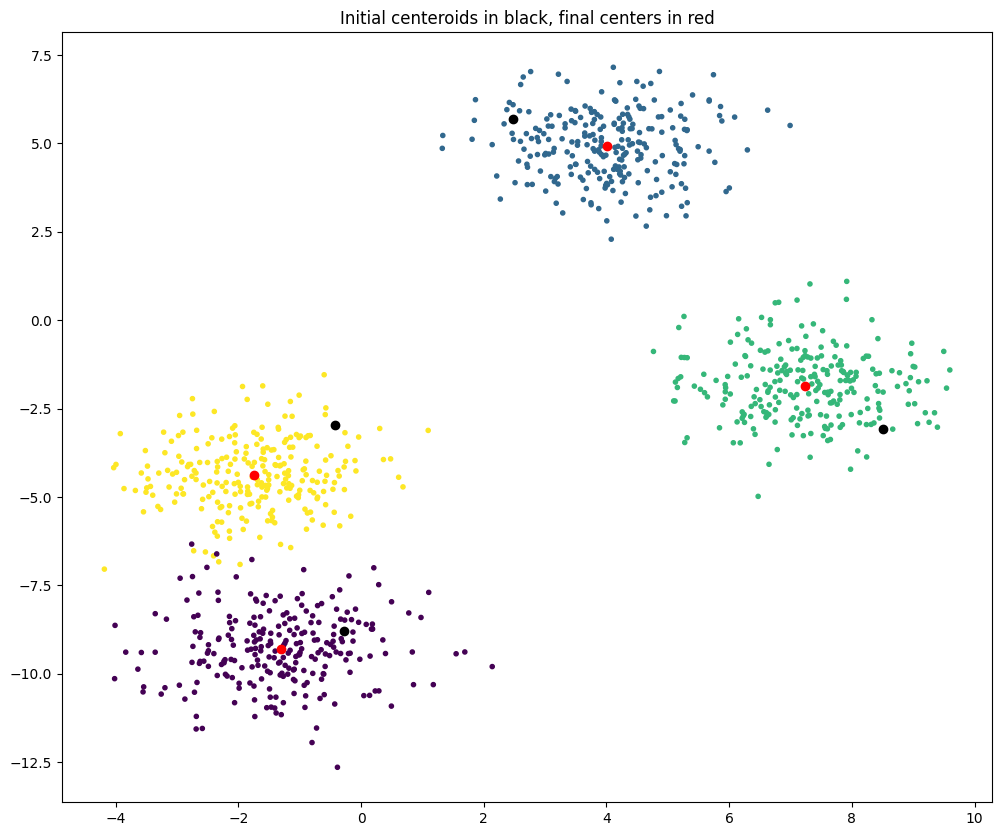

In [30]:
plt.figure(figsize=(12,10))
plt.title("Initial centeroids in black, final centers in red")
plt.scatter(X[:, 0], X[:, 1], marker='.', c=y)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:,1], c='r')
plt.scatter(kmeans.intial_centroids[:, 0], kmeans.intial_centroids[:,1], c='k')
plt.show()